# Importing Libraries

In [ ]:
pip install langdetect

In [ ]:
pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install FarasaPy

In [ ]:
pip install farasapy

In [ ]:
pip install tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/aub-mind/arabert.git

Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535
Receiving objects: 100% (600/600), 9.14 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
import re
from yellowbrick.text import TSNEVisualizer
from wordcloud import WordCloud
import pyarabic.araby as araby
from pyarabic.araby import strip_tashkeel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from flask import Flask, request, jsonify
import requests
from langdetect import detect
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectPercentile, VarianceThreshold
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import nltk
from nltk.stem.snowball import SnowballStemmer
from farasa.segmenter import FarasaSegmenter
from arabert.preprocess import ArabertPreprocessor

# Load and Explore Data

In [ ]:
data = pd.read_csv("/content/Arabic-Empathetic-Chatbot_master_arabic-empathetic-conversations.excel.csv")

In [ ]:
data.head()

,emotion,context,response
0,sentimental,أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...,هل كان هذا صديقًا كنت تحبه أم مجرد أفضل صديق؟
1,sentimental,كان هذا أفضل صديق. اشتقت لها.,اين ذهبت؟
2,sentimental,لم نعد نتحدث.,هل كان هذا شيء حدث بسبب جدال؟
3,afraid,أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام,أجل؟ أنا حقا لا أرى كيف
4,afraid,ألا تشعر بذلك .. إنه لأمر عجيب,أصطدم في الواقع بجدران فارغة في كثير من الأحيا...


In [ ]:
data.shape

(14556, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14556 entries, 0 to 14555
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   14556 non-null  object
 1   context   14556 non-null  object
 2   response  14556 non-null  object
dtypes: object(3)
memory usage: 341.3+ KB


In [ ]:
data.describe()

,emotion,context,response
count,14556,14556,14556
unique,32,14438,14196
top,surprised,5,ماذا حدث؟
freq,837,14,30


In [ ]:
data['emotion'].unique()

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated'],
      dtype=object)

In [ ]:
# Define a function to check the language of a text
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

In [ ]:
data['language'] = data['response'].apply(detect_language)
data['language'] = data['context'].apply(detect_language)

In [ ]:
data['language'] = data['response'].apply(detect_language)
data['language'] = data['context'].apply(detect_language)

# Filter out English rows
data = data[data['language'] != 'en']

# Remove English columns
data = data.drop('language', axis=1)

##convert emotion


In [ ]:
mapping_dict = {
    "excited": "joy",
    "proud": "joy",
    "grateful": "joy",
    "hopeful": "joy",
    "confident": "joy",
    "joyful"  : "joy",
    "content" : "joy",
    "prepared": "joy",

    "anticipating": "Love",
    "caring": "Love",
    "sentimental": "Love",
    "trusting": "Love",
    "faithful": "Love",
    "nostalgic": "Love",

    "surprised":"surprise",
    "impressed":"surprise",

    "sad": "Sadness",
    "lonely": "Sadness",
    "guilty": "Sadness",
    "disappointed": "Sadness",
    "devastated": "Sadness",
    "embarrassed": "Sadness",
    "ashamed": "Sadness",

    "angry":"anger",
    "annoyed":"anger",
    "furious":"anger",
    "disgusted":"anger",
    "jealous":"anger",

    "afraid":"fear",
    "terrified":"fear",
    "anxious":"fear",
    "apprehensive":"fear",
}

In [ ]:
data["emotion"]=data["emotion"].replace(mapping_dict)

In [ ]:
data["emotion"].unique()

array(['Love', 'fear', 'joy', 'anger', 'Sadness', 'surprise'],
      dtype=object)

In [ ]:
stemmer = SnowballStemmer("arabic")

In [ ]:
def stem_arabic_text(text):
    # Tokenize the text
    words = text.split()

    # Stem the words
    stemmed_words = [stemmer1.stem(word) for word in words]

    # Reconstruct the text
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

In [ ]:
data.isnull().sum()

emotion     0
context     0
response    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data.duplicated()]

,emotion,context,response


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
le = LabelEncoder()
data['emotion_encoded'] = le.fit_transform(data['emotion'])

In [ ]:
data.head()

,emotion,context,response,emotion_encoded
0,Love,أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...,هل كان هذا صديقًا كنت تحبه أم مجرد أفضل صديق؟,0
1,Love,كان هذا أفضل صديق. اشتقت لها.,اين ذهبت؟,0
2,Love,لم نعد نتحدث.,هل كان هذا شيء حدث بسبب جدال؟,0
3,fear,أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام,أجل؟ أنا حقا لا أرى كيف,3
4,fear,ألا تشعر بذلك .. إنه لأمر عجيب,أصطدم في الواقع بجدران فارغة في كثير من الأحيا...,3


In [ ]:
data.tail()

,emotion,context,response,emotion_encoded
14551,Sadness,من المؤسف للغاية كيف تعامل السيدات قلب الرجال ...,كيف تعني هذا؟ أعتقد أن ذلك يعتمد على السيدة ، ...,1
14552,Sadness,أنا فقط أشعر بالحزن لأن صديقتي كانت تربطها علا...,أوه ، أنا آسف للغاية - هذا أمر مروع يحدث. لكن ...,1
14553,Sadness,لقد اكتشفت مؤخرًا أن قرار زميل في العمل أدى إل...,انا فى غاية الاسف! هذا محبط للغاية! هل يمكنك ا...,1
14554,Sadness,نعم ، كان الأمر محبطًا. مشرفنا غير مشارك إلى ح...,أنا لا ألومك ، سأتحدث معه. حتى لو لم يكن مشارك...,1
14555,anger,كنت أقوم بنقل الأثاث بين الغرف وانهارت إحدى خز...,أوه ، أراهن أن هذا أزعجك! إنه أمر سيء بما يكفي...,2


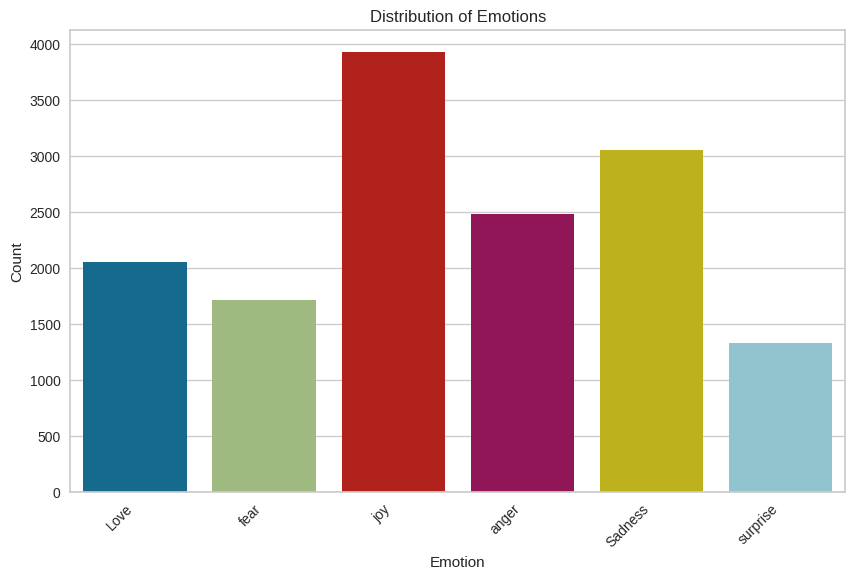

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=data)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

In [ ]:
def preprocess_arabic_text(text):
    # Remove diacritics (Tashkeel) to standardize text
    text = strip_tashkeel(text)

    # Normalize Arabic text to standard form
    text = araby.normalize_ligature(text)

    # Remove non-Arabic characters, numbers, and extra spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Feature Engineering

In [ ]:
# Split the data
X = data['context']
y = data['emotion_encoded']

In [ ]:
X

0        أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...
1                            كان هذا أفضل صديق. اشتقت لها.
2                                            لم نعد نتحدث.
3           أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام
4                           ألا تشعر بذلك .. إنه لأمر عجيب
                               ...                        
14551    من المؤسف للغاية كيف تعامل السيدات قلب الرجال ...
14552    أنا فقط أشعر بالحزن لأن صديقتي كانت تربطها علا...
14553    لقد اكتشفت مؤخرًا أن قرار زميل في العمل أدى إل...
14554    نعم ، كان الأمر محبطًا. مشرفنا غير مشارك إلى ح...
14555    كنت أقوم بنقل الأثاث بين الغرف وانهارت إحدى خز...
Name: context, Length: 14555, dtype: object

In [ ]:
model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

[2023-08-06 11:29:46,431 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
def preprocess_arabic_text_bert(text):
    return arabert_prep.preprocess(text)

In [ ]:
X=X.apply(preprocess_arabic_text_bert)

In [ ]:
X

0        أتذكر أنني ذهب +ت ل+ مشاهد +ة ال+ ألعاب ال+ نا...
1                     كان هذا أفضل صديق . اشتق +ت ل+ +ها .
2                                           لم نعد نتحدث .
3        أشعر و+ كأنني ضرب على جدار فارغ عندما أرى ال+ ...
4                    ألا تشعر ب+ ذلك . . إن +ه ل+ أمر عجيب
                               ...                        
14551    من ال+ مؤسف ل+ ال+ غاي +ة كيف تعامل ال+ سيد +ا...
14552    أنا فقط أشعر ب+ ال+ حزن ل+ أن صديق +ت +ي كان +...
14553    لقد اكتشف +ت مؤخر +ا أن قرار زميل في ال+ عمل أ...
14554    نعم ، كان ال+ أمر محبط +ا . مشرف +نا غير مشارك...
14555    +كن +ت أقوم ب+ نقل ال+ أثاث بين ال+ غرف و+ انه...
Name: context, Length: 14555, dtype: object

In [ ]:
stemmer = FarasaStemmer()

In [ ]:
X = X.apply(preprocess_arabic_text)

In [ ]:
X

0        أتذكر أنني ذهب ت ل مشاهد ة ال ألعاب ال ناري ة ...
1                            كان هذا أفضل صديق اشتق ت ل ها
2                                             لم نعد نتحدث
3         أشعر و كأنني ضرب على جدار فارغ عندما أرى ال ظلام
4                           ألا تشعر ب ذلك إن ه ل أمر عجيب
                               ...                        
14551    من ال مؤسف ل ال غاي ة كيف تعامل ال سيد ات قلب ...
14552    أنا فقط أشعر ب ال حزن ل أن صديق ت ي كان ت تربط...
14553    لقد اكتشف ت مؤخر ا أن قرار زميل في ال عمل أدى ...
14554    نعم ، كان ال أمر محبط ا مشرف نا غير مشارك إلى ...
14555    كن ت أقوم ب نقل ال أثاث بين ال غرف و انهار ت إ...
Name: context, Length: 14555, dtype: object

In [ ]:
X

0        أتذكر أنني ذهب ت ل مشاهد ة ال ألعاب ال ناري ة ...
1                            كان هذا أفضل صديق اشتق ت ل ها
2                                             لم نعد نتحدث
3         أشعر و كأنني ضرب على جدار فارغ عندما أرى ال ظلام
4                           ألا تشعر ب ذلك إن ه ل أمر عجيب
                               ...                        
14551    من ال مؤسف ل ال غاي ة كيف تعامل ال سيد ات قلب ...
14552    أنا فقط أشعر ب ال حزن ل أن صديق ت ي كان ت تربط...
14553    لقد اكتشف ت مؤخر ا أن قرار زميل في ال عمل أدى ...
14554    نعم ، كان ال أمر محبط ا مشرف نا غير مشارك إلى ...
14555    كن ت أقوم ب نقل ال أثاث بين ال غرف و انهار ت إ...
Name: context, Length: 14555, dtype: object

In [ ]:
print(X.isnull().sum())

0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform to TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
df_tfidf.head()

,آباء,آثار,آجل,آخذ,آخر,آذان,آر,آرثر,آسف,آسيا,...,يوفر,يولد,يولي,يوليو,يوم,يومي,يون,يونان,يوناني,يونغ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transform to Bow
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)

X_test_bow = tfidf_vectorizer.transform(X_test)

In [ ]:
df_bow = pd.DataFrame(X_train_bow.toarray(),columns=vectorizer_bow.get_feature_names_out())

In [ ]:
df_bow.head()

,آباء,آثار,آجل,آخذ,آخر,آذان,آر,آرثر,آسف,آسيا,...,يوفر,يولد,يولي,يوليو,يوم,يومي,يون,يونان,يوناني,يونغ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


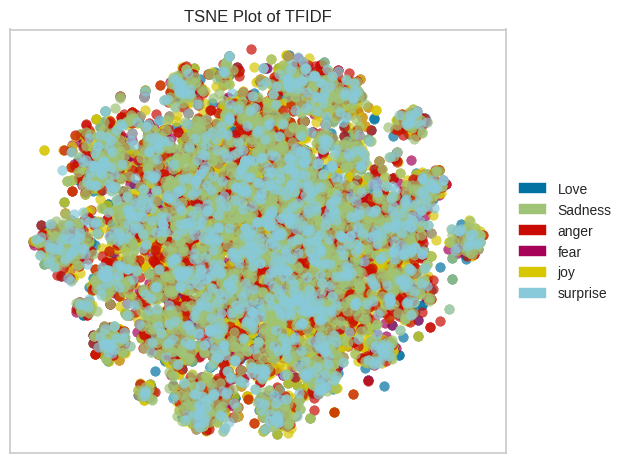

<Axes: title={'center': 'TSNE Plot of TFIDF'}>

In [ ]:
tsne_tf = TSNEVisualizer(title="TSNE Plot of TFIDF")
tsne_tf.fit(df_tfidf,data["emotion"])
tsne_tf.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


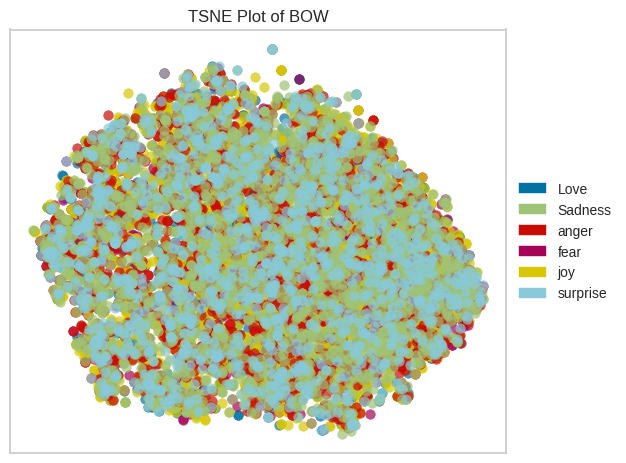

<Axes: title={'center': 'TSNE Plot of BOW'}>

In [ ]:
tsne_bow = TSNEVisualizer(title="TSNE Plot of BOW")
tsne_bow.fit(df_bow,data["emotion"])

tsne_bow.show()

# Clustering

In [ ]:
# Extract the context only
context = data['context']
context = context.apply(preprocess_arabic_text)

In [ ]:
# create vectorizer
vectorizer = TfidfVectorizer()

# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(context)

In [ ]:
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [ ]:
# cluster the documents using k-means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=5, n_init=5, random_state=42)

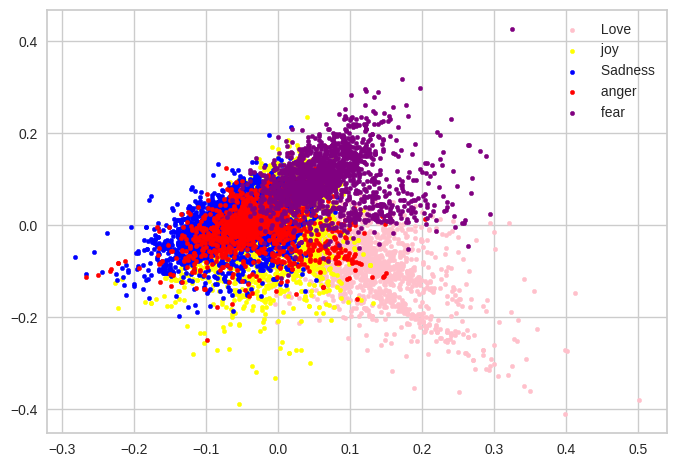

In [ ]:
# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = context
results['cluster'] = kmeans.labels_

# print the results
#print(results.sample(5))

# plot the results
colors = ['pink', 'yellow', 'blue', 'red', 'purple']
cluster = ['Love','joy', 'Sadness', 'anger', 'fear']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.08480114642326161


# Classification

In [ ]:
class EmotionClassifier:
    def __init__(self):
        self.tfidf_vectorizer = TfidfVectorizer()
        self.clf_nb = MultinomialNB()
        self.clf_svm = SVC()
        self.clf_lr = LogisticRegression()

    def preprocess_text(self, text):
        # Remove diacritics (Tashkeel) to standardize text
        text = strip_tashkeel(text)

        # Normalize Arabic text to standard form
        text = araby.normalize_ligature(text)

        # Remove non-Arabic characters, numbers, and extra spaces
        text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def train(self, X_train, y_train):
        X_train_processed = [self.preprocess_text(text) for text in X_train]
        X_train_tfidf = self.tfidf_vectorizer.fit_transform(X_train_processed)

        self.clf_nb.fit(X_train_tfidf, y_train)
        self.clf_svm.fit(X_train_tfidf, y_train)
        self.clf_lr.fit(X_train_tfidf, y_train)

    def predict(self, X_test):
        X_test_processed = [self.preprocess_text(text) for text in X_test]
        X_test_tfidf = self.tfidf_vectorizer.transform(X_test_processed)

        y_pred_nb = self.clf_nb.predict(X_test_tfidf)
        y_pred_svm = self.clf_svm.predict(X_test_tfidf)
        y_pred_lr = self.clf_lr.predict(X_test_tfidf)

        return y_pred_nb, y_pred_svm, y_pred_lr

    def evaluate_accuracy(self, X_val, y_val):
        X_val_processed = [self.preprocess_text(text) for text in X_val]
        X_val_tfidf = self.tfidf_vectorizer.transform(X_val_processed)

        y_pred_nb = self.clf_nb.predict(X_val_tfidf)
        y_pred_svm = self.clf_svm.predict(X_val_tfidf)
        y_pred_lr = self.clf_lr.predict(X_val_tfidf)

        accuracy_nb = accuracy_score(y_val, y_pred_nb)
        accuracy_svm = accuracy_score(y_val, y_pred_svm)
        accuracy_lr = accuracy_score(y_val, y_pred_lr)

        return accuracy_nb, accuracy_svm, accuracy_lr

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train

12395                             أفقد ثقتي في مهنتي ب بطء
3693     انته ت حمى كر ة ال قدم أخير ا لكن ي أتوقع فوز ...
13511                           ذاهب في إجاز ة إلى ال شاطئ
3118     أنا سعيد جد ا ب ال طريق ة التي تسير ب ها ال أم...
12143    ل ديك طريق ة تجعلني أشعر ب قليل من ال تحسن ، ش...
                               ...                        
5191     كان ال طقس دائم ا يبدو جيد ا و كان لدي نا ال ك...
13419    حق ا ؟ إن هم مفيد ون ل ال غاي ة و كن ت سعيد ا ...
5390     لا أريد أبد ا أن أفقد شهو ت ي التي لا تهدأ ل ا...
860                           لقد خدع ت صديق ي مر ة واحد ة
7270     لا لا يؤثر ذلك على أسعار ال تأمين ال خاص ة بي ...
Name: context, Length: 10188, dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes Accuracy on Validation Set: 0.456710948236372
SVM Accuracy on Validation Set: 0.510765002290426
Logistic Regression Accuracy on Validation Set: 0.5093907466788823


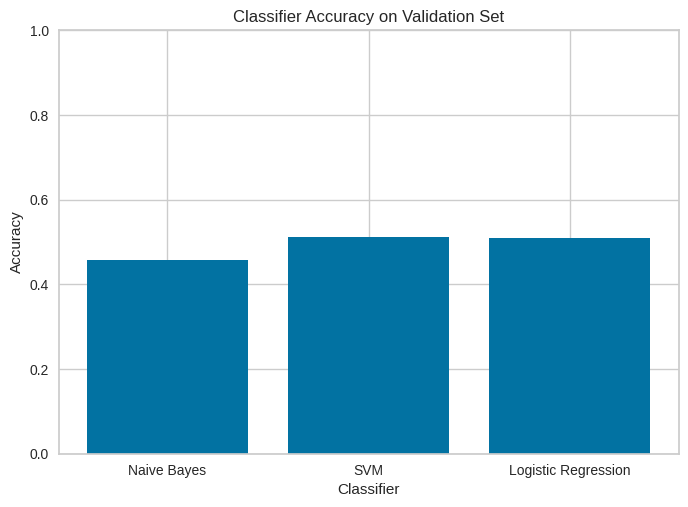

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

classifier = EmotionClassifier()
classifier.train(X_train, y_train)

# Evaluate accuracy on the validation set
y_pred_nb, y_pred_svm, y_pred_lr = classifier.predict(X_val)

accuracy_nb = accuracy_score(y_val, y_pred_nb)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
accuracy_lr = accuracy_score(y_val, y_pred_lr)

print("Naive Bayes Accuracy on Validation Set:", accuracy_nb)
print("SVM Accuracy on Validation Set:", accuracy_svm)
print("Logistic Regression Accuracy on Validation Set:", accuracy_lr)

# Plot the accuracies
classifiers = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracy_values = [accuracy_nb, accuracy_svm, accuracy_lr]

plt.bar(classifiers, accuracy_values)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy on Validation Set')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()


# Evaluation

In [ ]:
confusion_matrix_nb, confusion_matrix_svm, confusion_matrix_lr = \
    confusion_matrix(y_val, y_pred_nb), confusion_matrix(y_val, y_pred_svm), confusion_matrix(y_val, y_pred_lr)

print(confusion_matrix_nb)
print(confusion_matrix_svm)
print(confusion_matrix_lr)

[[ 37  66  12   1 171   0]
 [  4 262  17   1 176   0]
 [  3 103 109   0 123   0]
 [  1  64  20  34 150   0]
 [  5  48  15   0 553   1]
 [  3  36  10   2 154   2]]
[[ 76  59  24   8 119   1]
 [ 26 250  59   7 111   7]
 [  9  81 168   5  72   3]
 [  8  53  27 101  79   1]
 [ 26  59  33  13 483   8]
 [  9  32  23   3 103  37]]
[[ 92  53  28  11  95   8]
 [ 33 247  57  13  93  17]
 [ 15  73 169  13  63   5]
 [ 16  47  31 110  60   5]
 [ 42  63  34  20 446  17]
 [ 14  26  25   4  90  48]]


Confusion matrix for NB


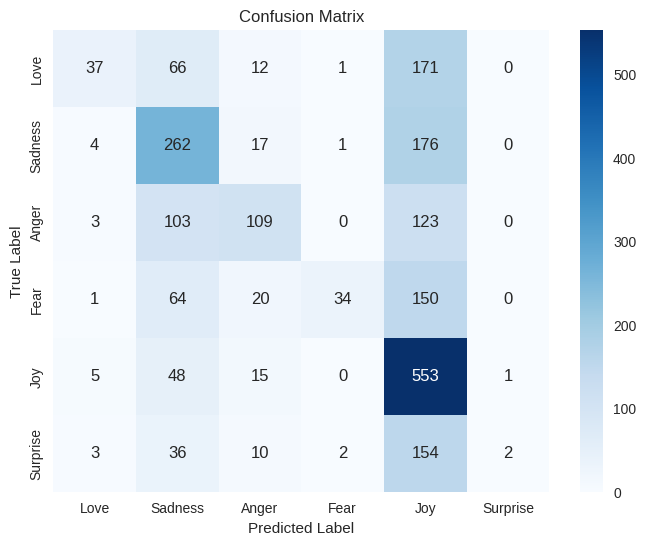

Confusion matrix for svm


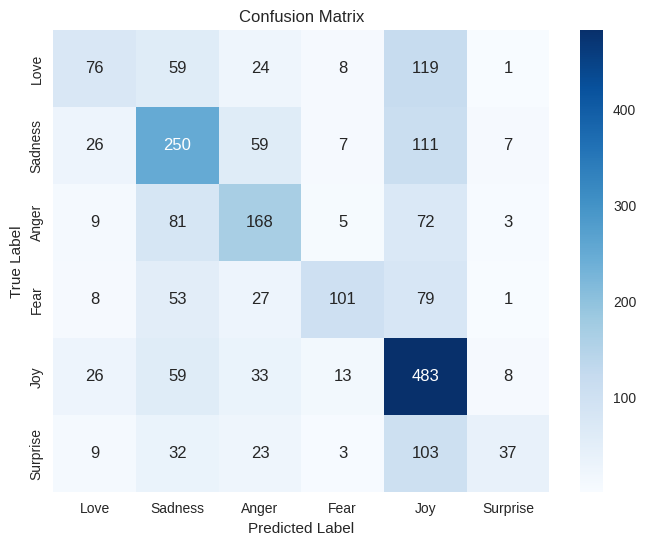

Confusion matrix for LR


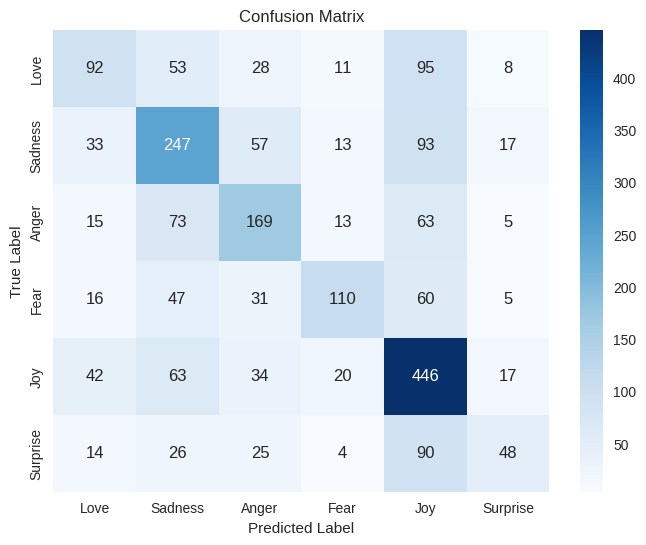

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Convert the integer labels back to emotion labels
emotion_labels = {0: 'Love', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Joy', 5: 'Surprise'}

# Calculate confusion matrices
confusion_matrix_nb = confusion_matrix(y_val, y_pred_nb)
confusion_matrix_svm = confusion_matrix(y_val, y_pred_svm)
confusion_matrix_lr = confusion_matrix(y_val, y_pred_lr)

# Convert the arrays to emotion labels
labels = [emotion_labels[label] for label in range(len(emotion_labels))]

# Plot confusion matrices
print("Confusion matrix for NB")
plot_confusion_matrix(confusion_matrix_nb, labels)
print("Confusion matrix for svm")
plot_confusion_matrix(confusion_matrix_svm, labels)
print("Confusion matrix for LR")
plot_confusion_matrix(confusion_matrix_lr, labels)

In [ ]:
from sklearn.metrics import classification_report

# Convert the integer labels back to emotion labels
emotion_labels = {0: 'Love', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Joy', 5: 'Surprise'}

# Convert the arrays to emotion labels
y_val_labels = [emotion_labels[label] for label in y_val]
y_pred_nb_labels = [emotion_labels[label] for label in y_pred_nb]
y_pred_svm_labels = [emotion_labels[label] for label in y_pred_svm]
y_pred_lr_labels = [emotion_labels[label] for label in y_pred_lr]

# Calculate classification report
classification_report_nb = classification_report(y_val_labels, y_pred_nb_labels)
classification_report_svm = classification_report(y_val_labels, y_pred_svm_labels)
classification_report_lr = classification_report(y_val_labels, y_pred_lr_labels)

print("Classification Report - Naive Bayes:")
print(classification_report_nb)
print("Classification Report - SVM:")
print(classification_report_svm)
print("Classification Report - Logistic Regression:")
print(classification_report_lr)

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

       Anger       0.60      0.32      0.42       338
        Fear       0.89      0.13      0.22       269
         Joy       0.42      0.89      0.57       622
        Love       0.70      0.13      0.22       287
     Sadness       0.45      0.57      0.50       460
    Surprise       0.67      0.01      0.02       207

    accuracy                           0.46      2183
   macro avg       0.62      0.34      0.32      2183
weighted avg       0.57      0.46      0.39      2183

Classification Report - SVM:
              precision    recall  f1-score   support

       Anger       0.50      0.50      0.50       338
        Fear       0.74      0.38      0.50       269
         Joy       0.50      0.78      0.61       622
        Love       0.49      0.26      0.34       287
     Sadness       0.47      0.54      0.50       460
    Surprise       0.65      0.18      0.28       207

    accurac

### On testset

In [ ]:
accuracy_test_nb, accuracy_test_svm, accuracy_test_lr = classifier.evaluate_accuracy(X_test, y_test)

In [ ]:
print(accuracy_test_nb)
print(accuracy_test_svm)
print(accuracy_test_lr)

0.4661172161172161
0.5251831501831502
0.5183150183150184


# Error Analysis

In [ ]:
# Create a dictionary to map encoded emotions to their labels
emotions = {0: 'Love', 3: 'fear', 4: 'joy', 2: 'anger', 1: 'Sadness', 5: 'surprise'}

# Function to get misclassified instances and their true and predicted emotions
def get_misclassified_instances(y_true, y_pred, emotions):
    misclassified_instances = []
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label != pred_label:
            true_emotion = emotions[true_label]
            pred_emotion = emotions[pred_label]
            misclassified_instances.append((true_emotion, true_label, pred_emotion, pred_label))
    return misclassified_instances

# Function to display misclassified instances
def display_misclassified_instances(misclassified_instances):
    for idx, (true_emotion, true_label, pred_emotion, pred_label) in enumerate(misclassified_instances, start=1):
        print(f"{idx}. True Emotion: {true_emotion}, Predicted Emotion: {pred_emotion}")
        print(f"   True Label: {true_label}, Predicted Label: {pred_label}")
        print()

# Instantiate and train the EmotionClassifier
classifier = EmotionClassifier()
classifier.train(X_train, y_train)

# Evaluate accuracy on the validation set
accuracy_nb, accuracy_svm, accuracy_lr = classifier.evaluate_accuracy(X_val, y_val)

# Perform error analysis for all classifiers
y_pred_nb, y_pred_svm, y_pred_lr = classifier.predict(X_val)
misclassified_nb = get_misclassified_instances(y_val, y_pred_nb, emotions)
misclassified_svm = get_misclassified_instances(y_val, y_pred_svm, emotions)
misclassified_lr = get_misclassified_instances(y_val, y_pred_lr, emotions)

# Display misclassified instances for each classifier
print("Misclassified Instances - Naive Bayes")
display_misclassified_instances(misclassified_nb)

print("Misclassified Instances - SVM")
display_misclassified_instances(misclassified_svm)

print("Misclassified Instances - Logistic Regression")
display_misclassified_instances(misclassified_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Streaming output truncated to the last 5000 lines.

474. True Emotion: joy, Predicted Emotion: Sadness
   True Label: 4, Predicted Label: 1

475. True Emotion: Sadness, Predicted Emotion: joy
   True Label: 1, Predicted Label: 4

476. True Emotion: surprise, Predicted Emotion: joy
   True Label: 5, Predicted Label: 4

477. True Emotion: fear, Predicted Emotion: Sadness
   True Label: 3, Predicted Label: 1

478. True Emotion: Love, Predicted Emotion: Sadness
   True Label: 0, Predicted Label: 1

479. True Emotion: anger, Predicted Emotion: Sadness
   True Label: 2, Predicted Label: 1

480. True Emotion: fear, Predicted Emotion: anger
   True Label: 3, Predicted Label: 2

481. True Emotion: Love, Predicted Emotion: Sadness
   True Label: 0, Predicted Label: 1

482. True Emotion: Sadness, Predicted Emotion: fear
   True Label: 1, Predicted Label: 3

483. True Emotion: Love, Predicted Emotion: Sadness
   True Label: 0, Predicted Label: 1

484. True Emotion: fear, Predicted Emotion: Sadness

In [ ]:
for i, misclassified_sample in enumerate(misclassified_nb, 1):
    true_emotion, predicted_emotion, true_label, predicted_label = misclassified_sample

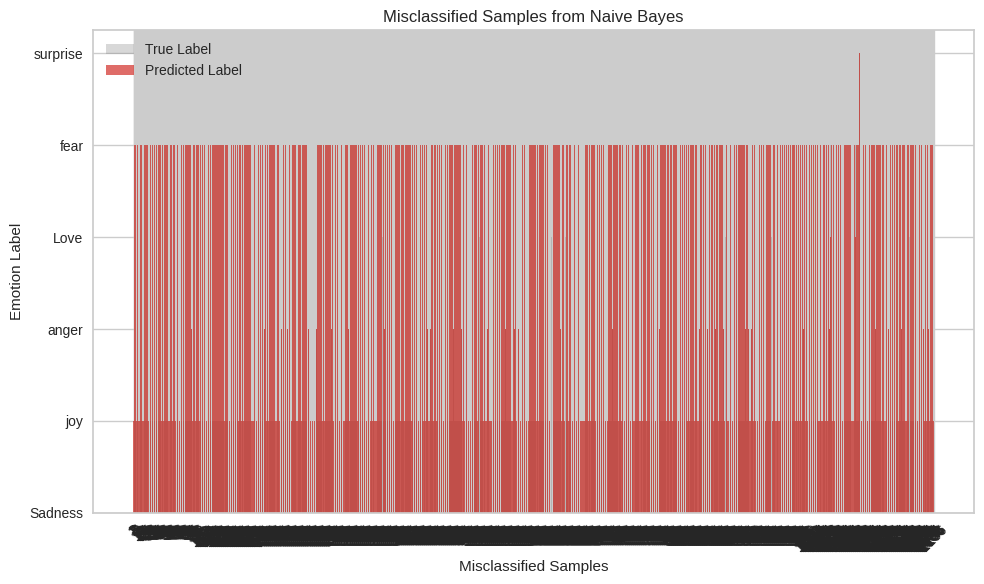

In [ ]:
# For Naive Bayes
misclassified_emotions = [misclassified_sample[0] for misclassified_sample in misclassified_nb]
true_labels = [misclassified_sample[2] for misclassified_sample in misclassified_nb]
predicted_labels = [misclassified_sample[3] for misclassified_sample in misclassified_nb]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_nb)), true_labels, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_nb)), predicted_labels, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_nb)), range(1, len(misclassified_nb) + 1), rotation=45)
plt.xlabel('Misclassified Samples')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from Naive Bayes')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()

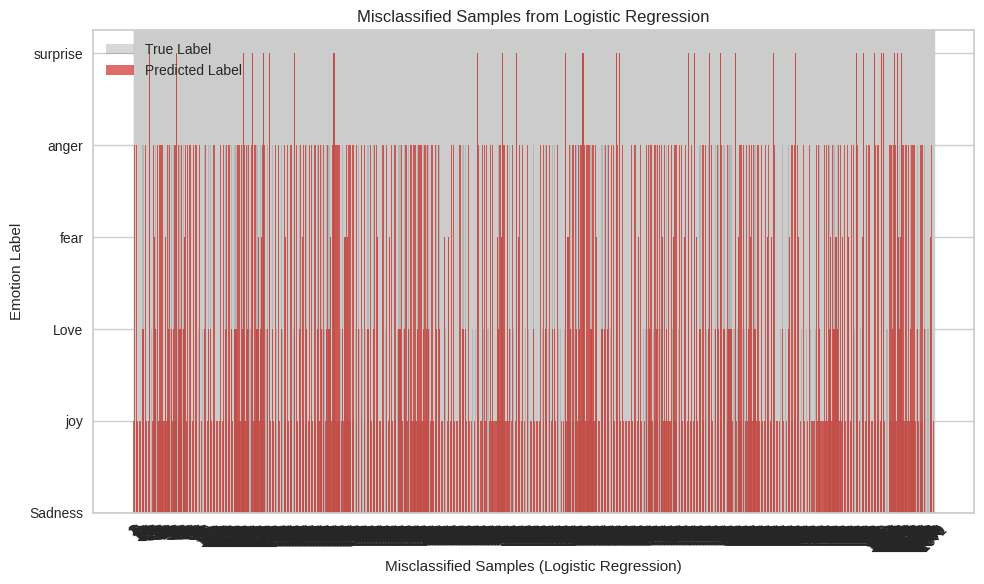

In [ ]:
# For Logistic Regression
misclassified_emotions_lr = [misclassified_sample[0] for misclassified_sample in misclassified_lr]
true_labels_lr = [misclassified_sample[2] for misclassified_sample in misclassified_lr]
predicted_labels_lr = [misclassified_sample[3] for misclassified_sample in misclassified_lr]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_lr)), true_labels_lr, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_lr)), predicted_labels_lr, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_lr)), range(1, len(misclassified_lr) + 1), rotation=45)
plt.xlabel('Misclassified Samples (Logistic Regression)')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from Logistic Regression')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()

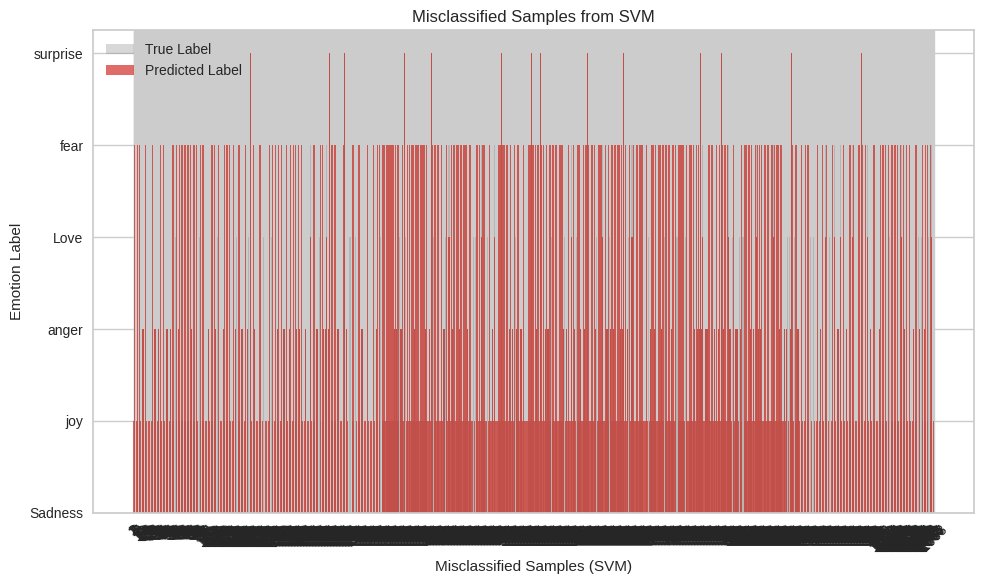

In [ ]:
# For SVM
misclassified_emotions_svm = [misclassified_sample[0] for misclassified_sample in misclassified_svm]
true_labels_svm = [misclassified_sample[2] for misclassified_sample in misclassified_svm]
predicted_labels_svm = [misclassified_sample[3] for misclassified_sample in misclassified_svm]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_svm)), true_labels_svm, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_svm)), predicted_labels_svm, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_svm)), range(1, len(misclassified_svm) + 1), rotation=45)
plt.xlabel('Misclassified Samples (SVM)')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from SVM')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()